In [159]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

In [133]:
df = pd.read_csv(r"C:\Users\Administrator\Documents\Yagnesh\Dataset.csv")

In [134]:
df2 = df.copy()
scaler = StandardScaler()
DiagnosisLE = LabelEncoder()
model = RandomForestClassifier(n_estimators = 200) 
logic = LogisticRegression()
dtc = DecisionTreeClassifier(criterion = 'entropy')

In [135]:
df2.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [136]:
pd.set_option('display.max_columns',None)

In [137]:
df2.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [138]:
df2 = df2.drop(columns = ["perimeter_mean","area_mean","perimeter_worst","area_worst","compactness_mean","concavity_mean","concave points_mean",
                          "compactness_worst","concavity_worst","concave points_worst","Unnamed: 32","id"])

In [139]:
df2

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,0.16220,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,0.12380,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,0.14440,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,0.20980,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,0.14100,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,0.11660,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,0.11390,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,0.16500,0.4087,0.12400


In [140]:
df2['diagnosis'] = DiagnosisLE.fit_transform(df2['diagnosis'])

In [141]:
df2

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,0.16220,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,0.12380,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,0.14440,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,0.20980,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,0.14100,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,0.11660,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,0.11390,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,0.16500,0.4087,0.12400


<Axes: >

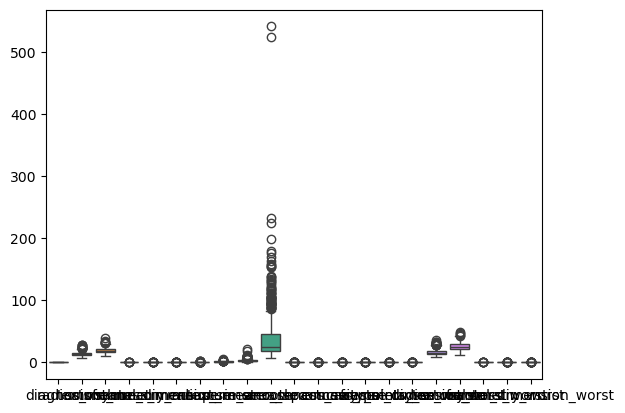

In [142]:
sns.boxplot(df2)

In [143]:
def Outliers(df,columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[(df[i] > upperlimit), i] = upperlimit
        df.loc[(df[i] < lowerlimit), i] = lowerlimit
    return df
df2 = Outliers(df2,df2.columns)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4660\414113003.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upperlimit), i] = upperlimit


<Axes: >

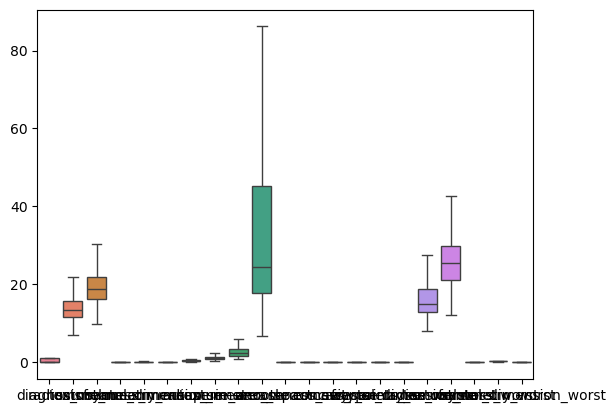

In [144]:
sns.boxplot(df2)

In [145]:
df2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
smoothness_mean            0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
smoothness_worst           0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [146]:
x = df2.drop(columns = 'diagnosis')
y = df2['diagnosis']

In [147]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state = 70, test_size = 30)

In [148]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [149]:
logic.fit(xtrainscaled,ytrain)
logics = logic.score(xtestscaled,ytest)

In [151]:
dtc.fit(xtrainscaled,ytrain)
dtcs = dtc.score(xtestscaled,ytest)

In [153]:
model.fit(xtrainscaled,ytrain)
rfcs = model.score(xtestscaled,ytest)

In [155]:
print("Classification Scores")
print("LogisticRegression Score:",logics)
print("Decision Tree Classifier Score:",dtcs)
print("Random Forest Classifier Score:",rfcs)

Classification Scores
LogisticRegression Score: 0.9666666666666667
Decision Tree Classifier Score: 0.9333333333333333
Random Forest Classifier Score: 0.9666666666666667


In [158]:
dumpattr = {
    'DiagnosisLE': DiagnosisLE,
    'logic': logic,
    'dtc': dtc,
    'model': model,
    'scaler': scaler
}
dump(dumpattr,'Diagnosis Data.joblib')

In [164]:
df2

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,0.118400,0.2419,0.07871,0.84865,0.90530,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.380,17.33,0.16220,0.41915,0.11890
1,1.0,20.57,17.77,0.084740,0.1812,0.05667,0.54350,0.73390,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.990,23.41,0.12380,0.27500,0.08902
2,1.0,19.69,21.25,0.109600,0.2069,0.05999,0.74560,0.78690,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.570,25.53,0.14440,0.36130,0.08758
3,1.0,11.42,20.38,0.133695,0.2464,0.07875,0.49560,1.15600,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.910,26.50,0.19010,0.41915,0.12301
4,1.0,20.29,14.34,0.100300,0.1809,0.05883,0.75720,0.78130,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.540,16.67,0.13740,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,0.111000,0.1726,0.05623,0.84865,1.25600,5.9835,86.20,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,25.450,26.40,0.14100,0.20600,0.07115
565,1.0,20.13,28.25,0.097800,0.1752,0.05533,0.76550,2.43415,5.2030,86.20,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,23.690,38.25,0.11660,0.25720,0.06637
566,1.0,16.60,28.08,0.084550,0.1590,0.05648,0.45640,1.07500,3.4250,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,0.11390,0.22180,0.07820
567,1.0,20.60,29.33,0.117800,0.2397,0.07016,0.72600,1.59500,5.7720,86.20,0.006522,0.061505,0.07117,0.01664,0.02324,0.006185,25.740,39.42,0.16500,0.40870,0.12301


In [161]:
df2.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.062916,19.254736,0.096266,0.180734,0.062604,0.384698,1.198057,2.699075,34.959487,0.006876,0.024561,0.030038,0.011601,0.020047,0.003591,16.183882,25.648453,0.132209,0.287616,0.083342
std,0.483918,3.340025,4.187510,0.013685,0.026067,0.006418,0.203612,0.485500,1.402982,24.294515,0.002410,0.014947,0.020577,0.005486,0.006572,0.001780,4.587249,6.054406,0.022320,0.053868,0.015993
min,0.000000,6.981000,9.710000,0.057975,0.111200,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,0.072500,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,0.116600,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,0.131300,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,0.146000,0.317900,0.092080
max,1.000000,21.900000,30.245000,0.133695,0.246400,0.078750,0.848650,2.434150,5.983500,86.200000,0.012612,0.061505,0.082490,0.025318,0.035960,0.008023,27.460000,42.680000,0.190100,0.419150,0.123010


In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   symmetry_mean            569 non-null    float64
 5   fractal_dimension_mean   569 non-null    float64
 6   radius_se                569 non-null    float64
 7   texture_se               569 non-null    float64
 8   perimeter_se             569 non-null    float64
 9   area_se                  569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5